<a href="https://colab.research.google.com/github/Narangaraw411/Dive-into-code/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1] Execution of various methods

Keras provides 4 types of Reccurent layers. All but SimpleRNN are gated recurrent neural networks.

In [1]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding,SimpleRNN,LSTM
from keras.layers import LSTM, GRU
from keras.datasets import imdb
from keras import backend as K

In [2]:
from keras.layers import Conv3D
from keras.layers import BatchNormalization
import numpy as np
import pylab as plt
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen)[:1500, :]
x_test = pad_sequences(x_test, maxlen=maxlen)[:1500, :]
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (1500, 80)
x_test shape: (1500, 80)


# [Problem 1] Execution of various methods

In [7]:
y_train, y_test = y_train[:1500], y_test[:1500]

In [9]:
print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/5
47/47 [==============================] - 22s 352ms/step - loss: 0.6874 - accuracy: 0.5440 - val_loss: 0.6473 - val_accuracy: 0.5753
Epoch 2/5
47/47 [==============================] - 21s 451ms/step - loss: 0.5327 - accuracy: 0.7847 - val_loss: 0.5086 - val_accuracy: 0.7447
Epoch 3/5
47/47 [==============================] - 15s 309ms/step - loss: 0.2032 - accuracy: 0.9253 - val_loss: 0.5491 - val_accuracy: 0.7233
Epoch 4/5
47/47 [==============================] - 15s 318ms/step - loss: 0.0827 - accuracy: 0.9753 - val_loss: 0.5958 - val_accuracy: 0.7667
Epoch 5/5
47/47 [==============================] - 1s 23ms/step - loss: 0.6996 - accuracy: 0.7547
Test score: 0.699568510055542
Test accuracy: 0.7546666860580444


In [10]:
from keras.layers import SimpleRNN

In [11]:
print('Build model Simple RNN')
simplernnmodel = Sequential()

simplernnmodel.add(Embedding(max_features, 128))
simplernnmodel.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
simplernnmodel.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
simplernnmodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
simplernnmodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = simplernnmodel.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Simple RNN Test score:', score)
print('Simpke RNN Test accuracy:', acc)

Build model Simple RNN
Train...
Epoch 1/5
47/47 [==============================] - 11s 207ms/step - loss: 0.7219 - accuracy: 0.4973 - val_loss: 0.6916 - val_accuracy: 0.5247
Epoch 2/5
47/47 [==============================] - 7s 153ms/step - loss: 0.6943 - accuracy: 0.5287 - val_loss: 0.6873 - val_accuracy: 0.5400
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6686 - accuracy: 0.5807 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 4/5
47/47 [==============================] - 7s 159ms/step - loss: 0.6392 - accuracy: 0.6447 - val_loss: 0.6850 - val_accuracy: 0.5593
Epoch 5/5
47/47 [==============================] - 0s 8ms/step - loss: 0.6701 - accuracy: 0.5773
Simple RNN Test score: 0.6701145768165588
Simpke RNN Test accuracy: 0.5773333311080933


In [12]:
from keras.layers import GRU

In [13]:
print('Build model GRU')
grumodel = Sequential()

grumodel.add(Embedding(max_features, 128))
grumodel.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
grumodel.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
grumodel.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
grumodel.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = grumodel.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('GRU Test score:', score)
print('GRU Test accuracy:', acc)


Build model GRU
Train...
Epoch 1/5
47/47 [==============================] - 26s 355ms/step - loss: 0.6892 - accuracy: 0.5393 - val_loss: 0.6739 - val_accuracy: 0.6247
Epoch 2/5
47/47 [==============================] - 15s 320ms/step - loss: 0.5536 - accuracy: 0.7233 - val_loss: 0.6091 - val_accuracy: 0.6480
Epoch 3/5
47/47 [==============================] - 16s 337ms/step - loss: 0.2761 - accuracy: 0.8967 - val_loss: 0.6377 - val_accuracy: 0.6933
Epoch 4/5
47/47 [==============================] - 13s 289ms/step - loss: 0.0976 - accuracy: 0.9693 - val_loss: 0.8290 - val_accuracy: 0.7100
Epoch 5/5
47/47 [==============================] - 1s 23ms/step - loss: 1.2268 - accuracy: 0.7153
GRU Test score: 1.2268118858337402
GRU Test accuracy: 0.7153333425521851


SimpleRNN couldn't store past information long ago, and could only consider data connections at short time intervals. Simple RNN Test score: ____________ Simple RNN Test accuracy: ___________

LSTM has a mechanism to store data, and it has become possible to consider the connection of data at long time intervals. Test score: 1.1524425745010376 Test accuracy: 0.8172000050544739

GRU is a model that simplifies LSTM. The input gate and the forgetting gate are integrated into one gate as an "update gate". GRU Test score: 1.4982067346572876 GRU Test accuracy: 0.8104000091552734

In [15]:
import numpy as np

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float32)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),dtype=np.float32)
    for i in range(n_samples):
        n = np.random.randint(3, 8)
        for j in range(n):
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1
            w = np.random.randint(2, 4)
            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,x_shift - w - 1: x_shift + w + 1,y_shift - w - 1: y_shift + w + 1,0] += noise_f * 0.1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,y_shift - w: y_shift + w, 0] += 1
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

noisy_movies, shifted_movies = generate_movies(n_samples=1200)

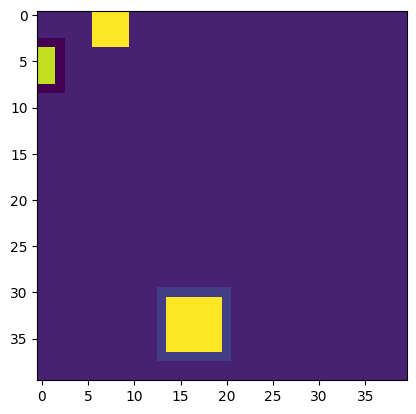

In [18]:
index = 1
x = noisy_movies[index]
fig = plt.figure()
viewer = fig.add_subplot(111)
plt.ion()
fig.show()
for i in range(len(x)):
    viewer.clear()
    viewer.imshow(x[i])
    plt.pause(.5)
    fig.canvas.draw()

In [19]:
from tensorflow.python.keras.layers import ConvLSTM2D

In [20]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),input_shape=(None, 40, 40, 1),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(BatchNormalization())
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),activation='sigmoid',padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

In [21]:

seq.fit(noisy_movies[:100], shifted_movies[:100], batch_size=10,epochs=1, validation_split=0.05)

10/10 [==============================] - 66s 610ms/step - loss: 0.8743 - val_loss: 0.6983


1/1 [==============================] - 0s 77ms/step


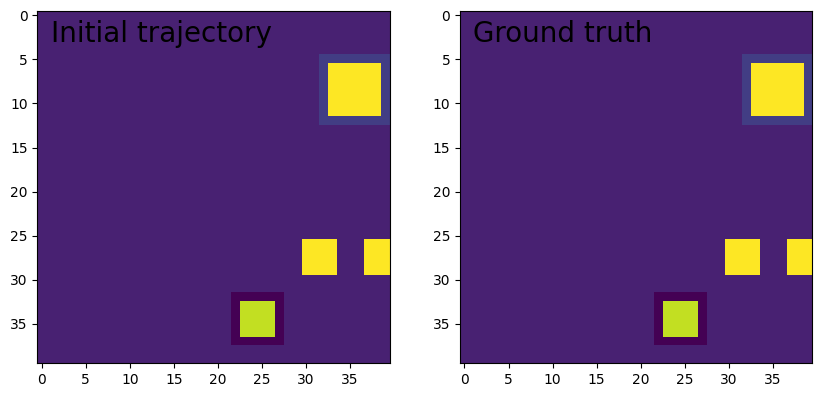

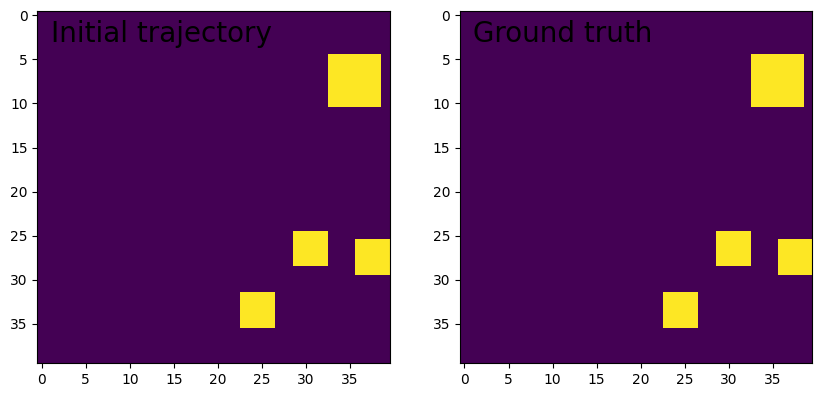

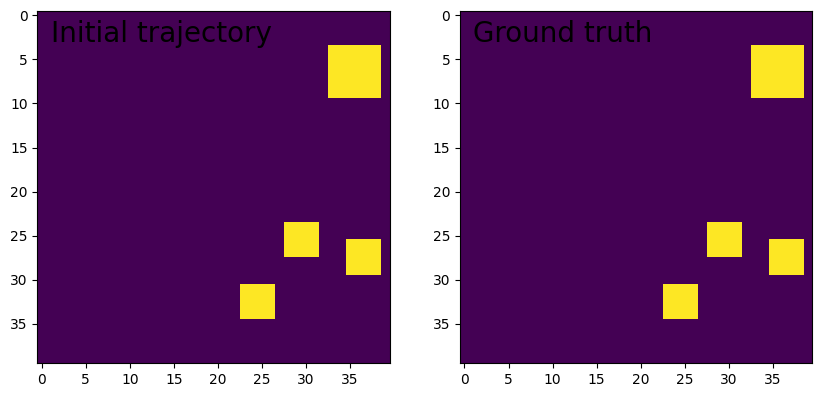

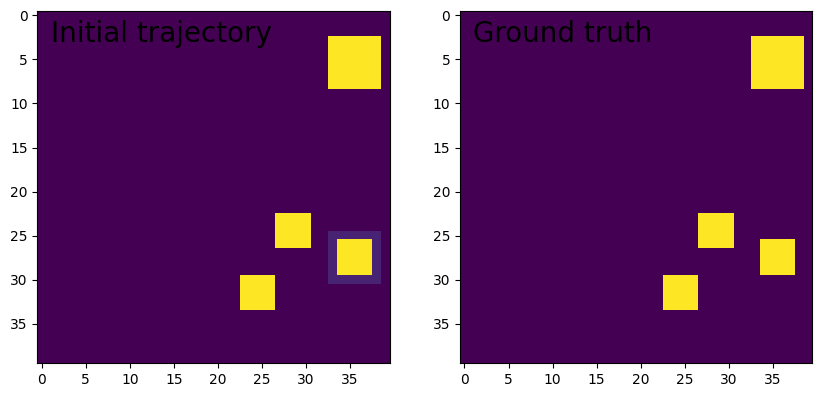

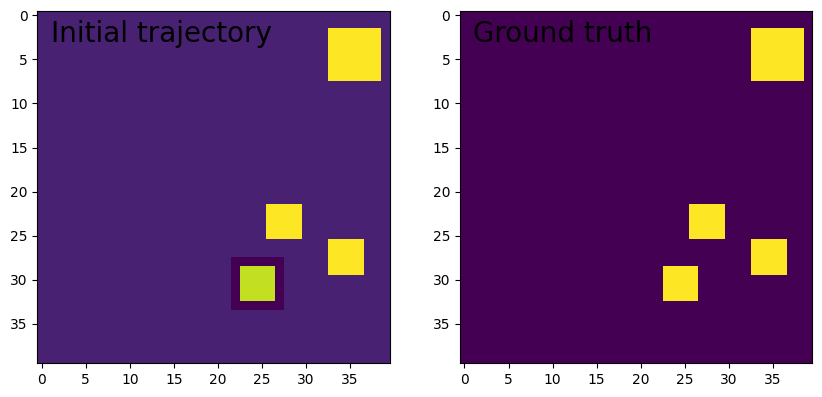

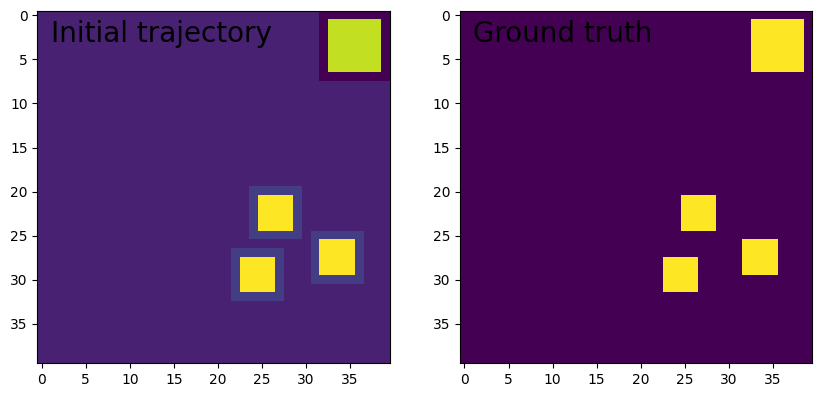

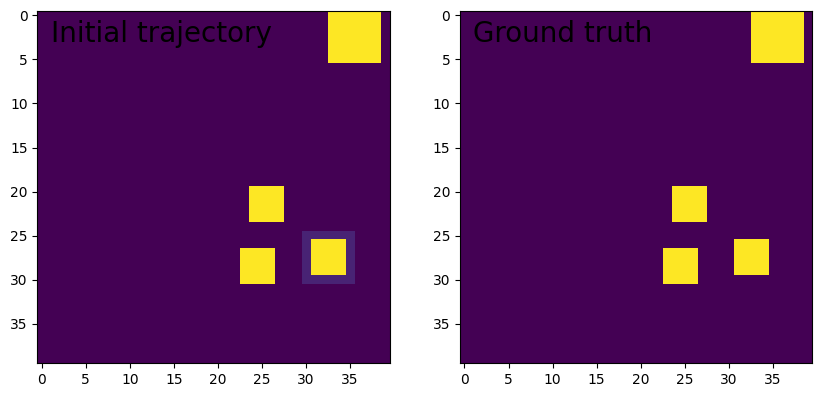

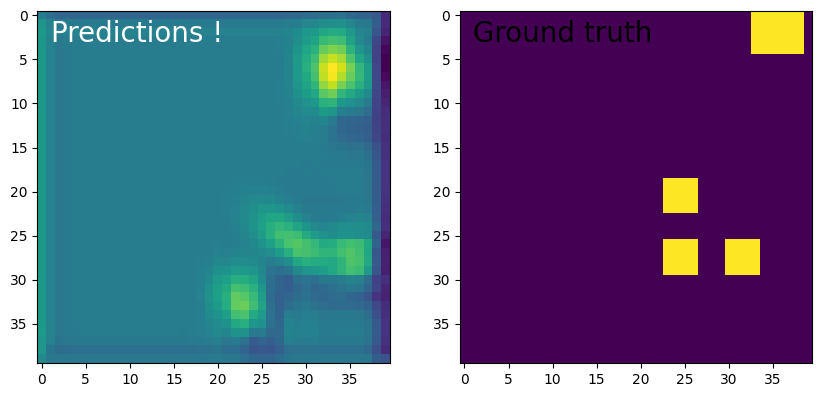

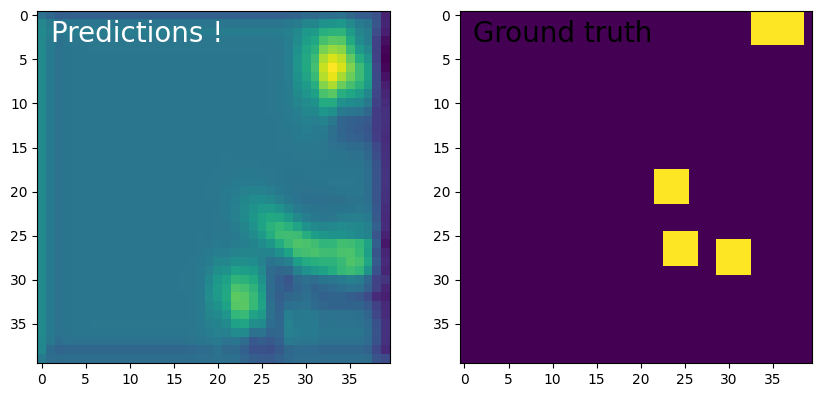

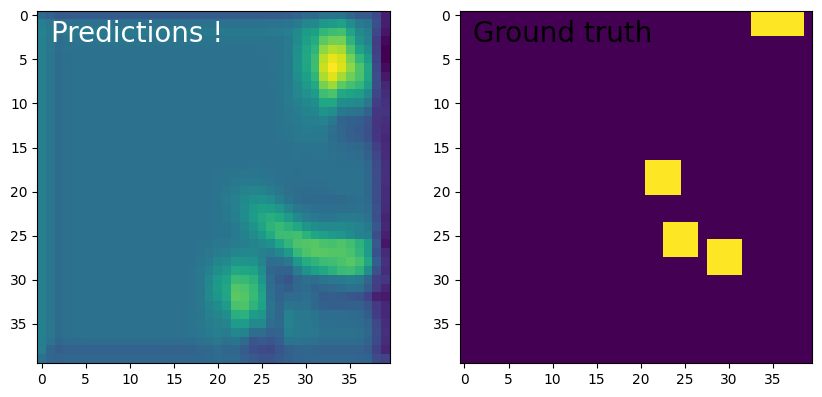

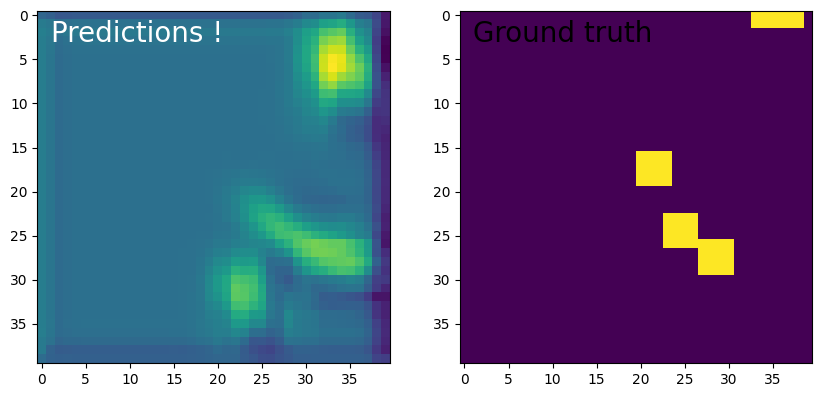

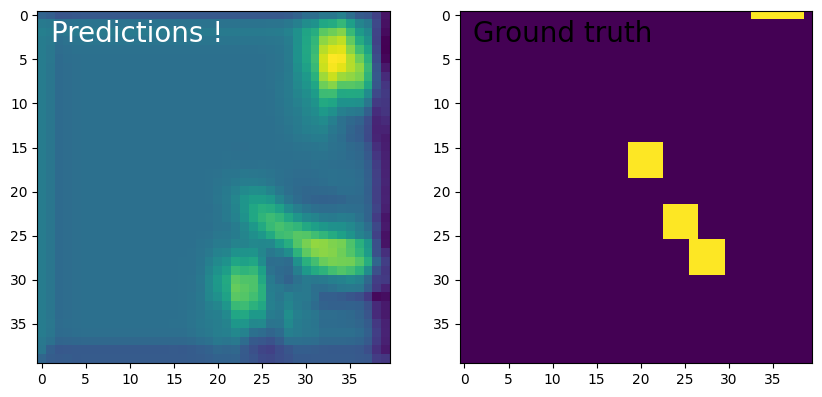

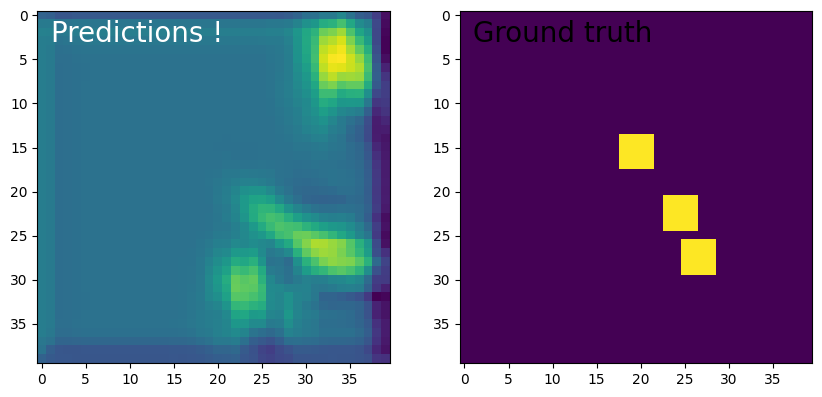

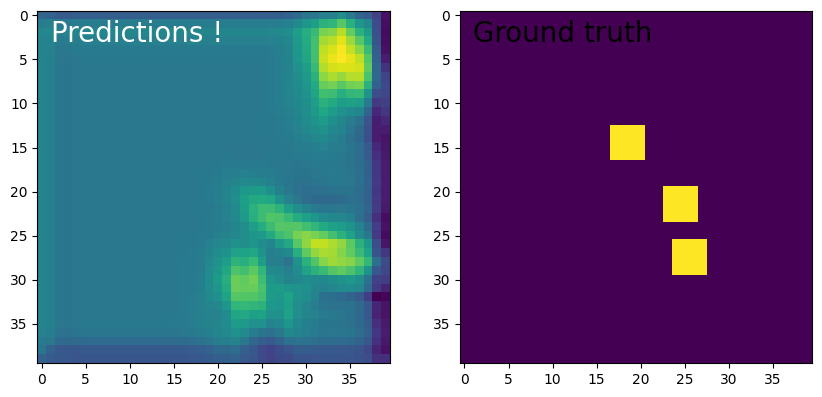

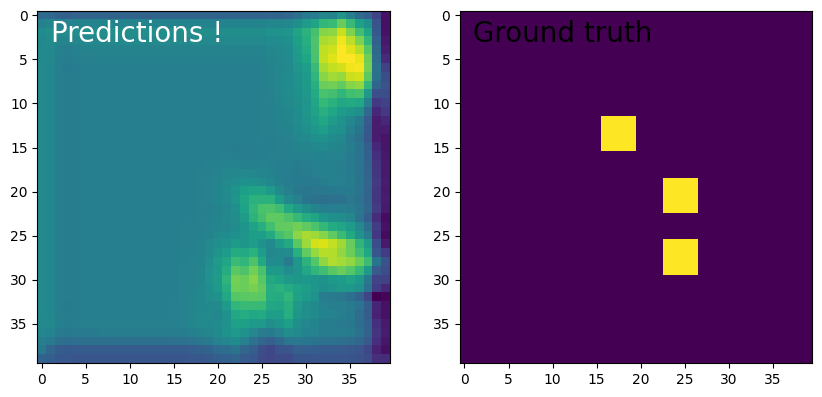

In [22]:
index = 1004
track = noisy_movies[index][:7, ::, ::, ::]
track2 = noisy_movies[index][::, ::, ::, ::]
for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)
for i in range(15):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121)
    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)
    toplot = track[i, ::, ::, 0]
    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)
    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[index][i - 1, ::, ::, 0]
    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# [Question 3] Description of other classes

There are other related classes mentioned in the documentation. Please explain what they are. This includes classes that are rarely dealt with.

RNN
SimpleRNNCell
GRUCell
LSTMCell
StackedRNNCells
CoDNNGRU
CuDNNLSTM

Answer: RNN - RNN cells distinguish themselves from the regular neurons in the sense that they have a state and thus can remember information from the past.

SimpleRNNCell - SimpleRNN Cell class- A Recurrent neural network can be seen as the repetition of a single cell.

LSTMCell - Cell class of LSTM layer - LSTM is a one kind of RNN and capable of learning long-term dependencies. LSTM cell consists of three gates including the forget gate, the input gate and the output gate.

GRUCell - Cell class of GRU layer - It is similar to LSTM. However it does not have a cell state (Ct). It only has a hidden state(Ht). Due to the simpler architecture, GRUs are faster to train.

StackedRNNCells - A wrapper that makes the behavior of an RNN cell stack look like a single cell. It is used to implement an efficient stacked RNN.

CoDNNGRU - Fast GRU implementation backed by cuDNN. - Can only be run on GPU.

CuDNNLSTM - Fast LSTM implementation backed by cuDNN - Can only be run on GPU.